In [5]:
### 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
### 📂 Step 2: Load Datasets
app = pd.read_csv("application_record.csv")
credit = pd.read_csv("credit_record.csv")


In [7]:
### 🧹 Step 3: Clean Application Data
app.drop_duplicates(subset='ID', inplace=True)


In [8]:
### 🏷️ Step 4: Process Credit Record and Create Target Variable
credit['STATUS'] = credit['STATUS'].replace(['X', 'C'], '0')
credit['STATUS'] = credit['STATUS'].astype(int)

# Define 'Bad client' if any status >= 2
credit['BAD_CLIENT'] = credit['STATUS'].apply(lambda x: 1 if x >= 2 else 0)
target_df = credit.groupby('ID')['BAD_CLIENT'].max().reset_index()
target_df.rename(columns={'BAD_CLIENT': 'TARGET'}, inplace=True)


In [9]:
### 🔗 Step 5: Merge Application Data with Target
full_data = pd.merge(app, target_df, on='ID', how='inner')


In [10]:
### 🛠️ Step 6: Feature Engineering
# Convert days to years
full_data['DAYS_BIRTH'] = full_data['DAYS_BIRTH'] / -365
full_data['DAYS_EMPLOYED'] = full_data['DAYS_EMPLOYED'].replace(365243, np.nan)
full_data['DAYS_EMPLOYED'] = full_data['DAYS_EMPLOYED'] / -365

# Drop irrelevant columns
cols_to_drop = ['ID', 'FLAG_MOBIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12']
full_data.drop(columns=cols_to_drop, inplace=True, errors='ignore')


In [11]:
### 🧼 Step 7: Handle Missing Values
full_data = full_data.dropna()


In [12]:
### 🔄 Step 8: Encode Categorical Variables
categorical_cols = full_data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    full_data[col] = le.fit_transform(full_data[col])


In [13]:
### 🎯 Step 9: Split Features and Target
X = full_data.drop(columns='TARGET')
y = full_data['TARGET']


In [14]:
### 📏 Step 10: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
### 🔀 Step 11: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [16]:
### 🤖 Step 12: Train Random Forest Model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
### 🧪 Step 13: Evaluate the Model
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




✅ Accuracy: 0.9823630818193874

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7410
           1       0.48      0.18      0.26       131

    accuracy                           0.98      7541
   macro avg       0.73      0.59      0.62      7541
weighted avg       0.98      0.98      0.98      7541


🧮 Confusion Matrix:
 [[7385   25]
 [ 108   23]]


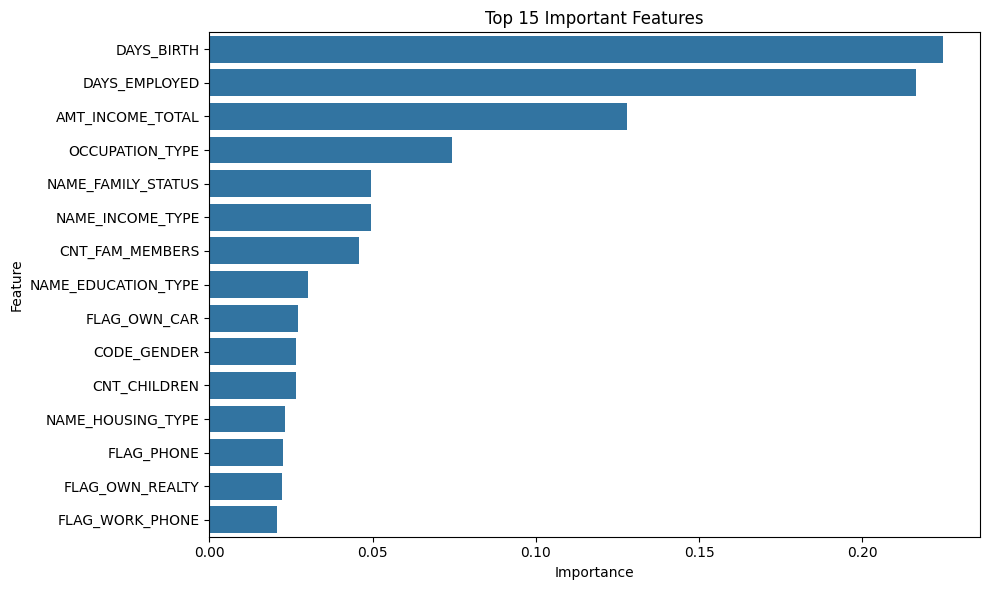

In [18]:
### 📊 Step 14: Feature Importance
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Important Features')
plt.tight_layout()
plt.show()
